In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
data=pd.read_csv('/content/all_kindle_review.csv')
df=data[['rating','reviewText']]
df.head()

,rating,reviewText
0,3,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...


# **Data Preprocessing**

In [29]:
df.isnull().sum()

,0
rating,0
reviewText,0


In [30]:
df['rating'].value_counts()

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


In [31]:
df['reviewText']=df['reviewText'].apply(lambda x:x.lower())

In [32]:
df['reviewText']=df['reviewText'].apply(lambda x:re.sub(r'[^a-z A-Z 0-9]','',x))

In [35]:
df['reviewText']=df['reviewText'].apply(lambda x:" ".join([y for y in x.split() if  y not in set(stopwords.words('english'))]))

In [38]:
df['reviewText']=df['reviewText'].apply(lambda x:re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

In [39]:
df['reviewText']=df['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [40]:
df['reviewText']=df['reviewText'].apply(lambda x: " ".join(x.split()))

In [41]:
df.head()

,rating,reviewText
0,3,jace rankin may short hes nothing mess man hau...
1,5,great short read didnt want put read one sitti...
2,3,ill start saying first four books wasnt expect...
3,3,aggie angela lansbury carries pocketbooks inst...
4,4,expect type book library pleased find price right


In [42]:
df['rating']=df['rating'].apply(lambda x:1 if x>3 else 0)

In [43]:
df.head()

,rating,reviewText
0,0,jace rankin may short hes nothing mess man hau...
1,1,great short read didnt want put read one sitti...
2,0,ill start saying first four books wasnt expect...
3,0,aggie angela lansbury carries pocketbooks inst...
4,1,expect type book library pleased find price right


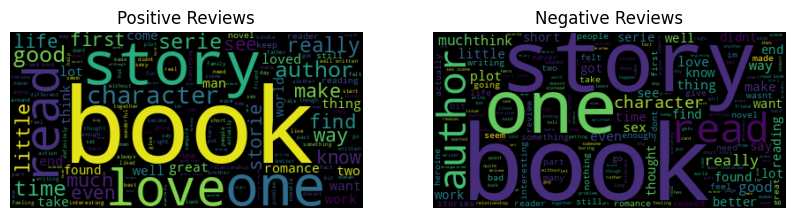

In [44]:
# @title Word Cloud of Positive and Negative Reviews

import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_reviews = df[df['rating'] == 1]['reviewText']
negative_reviews = df[df['rating'] == 0]['reviewText']

positive_wordcloud = WordCloud().generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud().generate(' '.join(negative_reviews))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
_ = plt.title('Negative Reviews')

# **Lemmatization**

In [45]:
lemmatizer=WordNetLemmatizer()

In [46]:
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word)for word in text.split()])

In [47]:
df['reviewText']=df['reviewText'].apply(lambda x:lemmatize_words(x))

In [48]:
df.head()

,rating,reviewText
0,0,jace rankin may short he nothing mess man haul...
1,1,great short read didnt want put read one sitti...
2,0,ill start saying first four book wasnt expecti...
3,0,aggie angela lansbury carry pocketbook instead...
4,1,expect type book library pleased find price right


# **Train Test Split**

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['reviewText'],df['rating'],test_size=0.2,random_state=42)

In [86]:
# prompt: ccheck for NAn in X_train and Y_Train

print("NaN values in X_train:", X_train.unique())
print("NaN values in y_train:", y_train.unique())


NaN values in X_train: ['looking forward book came double space every paragraph kindle edition since action move around formatting make story hard follow die hard like want botherits sad thing good book spoiled formatting fault author story good book energy read itive also emailed author'
 'already owned book spouse forgot already part library book unfortunate amazon safeguard place notify book already library'
 'cool forgot request rate came make mine unreliable rating doubt change rotation planet enough measure'
 ...
 'even though book free reservation based majority review went ahead downloaded book writing sophomoric plot poorly executed ended skimming book rather reading could say finished romance made sense carly bar owner dead set dating military barely new trey jake sudden spending roughly two day together mission conveniently carly could assist trey carly passionatly love jake trying get carlys pant two year sudden happy took sex would believed written 12th grader'
 'little mu

In [88]:
X_train = X_train.dropna()
y_train= y_train[X_train.index]
X_test = X_test.dropna()
y_test= y_test[X_test.index]

In [89]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9600,), (2400,), (9600,), (2400,))

In [90]:
X_train.head()

,reviewText
9182,looking forward book came double space every p...
11091,already owned book spouse forgot already part ...
6428,cool forgot request rate came make mine unreli...
288,short short story basically scene party one ni...
2626,secret service agent secrests even longer serv...


In [91]:
y_train.head()

,rating
9182,1
11091,0
6428,1
288,0
2626,1


# **Avg Word2Vec**

In [92]:
from gensim.models import Word2Vec
import gensim.downloader as api
from tqdm import tqdm

In [108]:
wv=api.load('word2vec-google-news-300')

KeyboardInterrupt: 

In [109]:
model=wv

In [110]:
wv.index_to_key

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [111]:
def avg_word2vec(doc):

  return np.mean([wv[word] for word in doc if word in wv.index_to_key],axis=0)

In [112]:
def make_word2vec(df):
  X=[]
  for doc in tqdm(df):
      X.append(avg_word2vec(doc))

In [113]:
X_train_wv=make_word2vec(X_train)
X_test_wv=make_word2vec(X_test)

  0%|          | 46/9600 [02:52<9:57:32,  3.75s/it] 


KeyboardInterrupt: 

In [102]:
X_train_wv = X_train_wv.dropna()
y_train= y_train[X_train_wv.index]
X_test_wv = X_test_wv.dropna()
y_test= y_test[X_test_wv.index]

AttributeError: 'NoneType' object has no attribute 'dropna'

In [ ]:
X_train_wv=np.array(X_train_wv).reshape(-1,1)
X_test_wv=np.array(X_test_wv).reshape(-1,1)

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_wv=GaussianNB()
model_wv.fit(X_train_wv,y_train)
y_pred_wv=model_wv.predict(X_test_wv)
print(accuracy_score(y_test,y_pred_wv))

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred_wv=model_wv.predict(X_test_wv)
print(classification_report(y_test,y_pred_wv))

In [ ]:
# prompt: plot confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_wv)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
